In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mpii_dataset.csv")
print(len(data))

2281


In [3]:
data.describe()

,head_x,head_y,head_vis,upper_neck_x,upper_neck_y,upper_neck_vis,thorax_x,thorax_y,thorax_vis,lsho_x,...,rknee_x,rknee_y,rknee_vis,lankl_x,lankl_y,lankl_vis,rankl_x,rankl_y,rankl_vis,sport
count,2281.000000,2281.000000,2281.0,2281.000000,2281.000000,2281.0,2281.000000,2281.000000,2281.000000,2281.000000,...,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000
mean,648.330417,169.478787,1.0,648.492906,237.498854,1.0,648.184130,249.470846,0.611135,668.030688,...,623.860587,463.389303,0.843051,663.075406,554.665936,0.805349,621.909689,553.496274,0.804033,0.695747
std,299.623725,130.019332,0.0,299.173034,123.925838,0.0,299.622553,123.759516,0.487599,303.493271,...,298.089164,167.839387,0.363832,310.982929,199.707134,0.396019,309.514088,198.996555,0.397030,0.460191
min,53.179700,-14.878300,1.0,48.474200,-3.175100,1.0,44.000000,21.000000,0.000000,22.000000,...,25.000000,125.000000,0.000000,3.000000,12.000000,0.000000,1.000000,23.000000,0.000000,0.000000
25%,413.327500,77.053600,1.0,415.277600,145.513100,1.0,415.000000,158.000000,0.000000,433.000000,...,388.000000,331.000000,1.000000,424.000000,399.000000,1.000000,380.000000,399.000000,1.000000,0.000000
50%,623.327600,140.651000,1.0,622.261800,213.978300,1.0,620.000000,227.000000,1.000000,647.000000,...,601.000000,454.000000,1.000000,651.000000,541.000000,1.000000,593.000000,541.000000,1.000000,1.000000
75%,831.000000,229.893000,1.0,835.406300,302.639200,1.0,835.000000,316.000000,1.000000,859.000000,...,814.000000,560.000000,1.000000,852.000000,664.000000,1.000000,819.000000,662.000000,1.000000,1.000000
max,1806.153000,883.143100,1.0,1752.151000,842.304300,1.0,1752.000000,844.000000,1.000000,1810.000000,...,1847.000000,1012.000000,1.000000,1867.000000,1074.000000,1.000000,1869.000000,1076.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   head_x          2281 non-null   float64
 1   head_y          2281 non-null   float64
 2   head_vis        2281 non-null   int64  
 3   upper_neck_x    2281 non-null   float64
 4   upper_neck_y    2281 non-null   float64
 5   upper_neck_vis  2281 non-null   int64  
 6   thorax_x        2281 non-null   int64  
 7   thorax_y        2281 non-null   int64  
 8   thorax_vis      2281 non-null   int64  
 9   lsho_x          2281 non-null   int64  
 10  lsho_y          2281 non-null   int64  
 11  lsho_vis        2281 non-null   int64  
 12  rsho_x          2281 non-null   int64  
 13  rsho_y          2281 non-null   int64  
 14  rsho_vis        2281 non-null   int64  
 15  lelb_x          2281 non-null   int64  
 16  lelb_y          2281 non-null   int64  
 17  lelb_vis        2281 non-null   i

In [5]:
# List columns with missing data
missing_data = data.isna().any()
columns_with_missing_data = missing_data[missing_data].index.tolist()
print(columns_with_missing_data)

[]


In [6]:
#Split the dataset into a stratified train and test set using sport as the class labels
strat_train_set, strat_test_set = train_test_split(data, test_size=0.2, 
                                                   stratify=data['sport'], random_state = 42)


#Begin preparation of data for ML algorithms with fresh copy of training data
train_copy = strat_train_set.copy()

#Separate the predictors and the label (sport)
train_data = train_copy.drop('sport', axis=1)
train_labels = train_copy['sport'].copy()

In [7]:
print(train_data.head())

        head_x    head_y  head_vis  upper_neck_x  upper_neck_y  \
1078  278.0987  200.2240         1      282.9013      113.7760   
312   635.0892  282.9583         1      636.9108      328.0417   
93    671.3803  188.8873         1      703.6197      264.1127   
655   604.2489   29.9131         1      583.7511      128.0869   
1077  935.7460   46.5917         1      941.2540      149.4083   

      upper_neck_vis  thorax_x  thorax_y  thorax_vis  lsho_x  ...  lknee_vis  \
1078               1       281       148           1     330  ...          1   
312                1       638       355           1     604  ...          1   
93                 1       710       279           0     728  ...          1   
655                1       575       170           1     650  ...          0   
1077               1       943       182           1     990  ...          1   

      rknee_x  rknee_y  rknee_vis  lankl_x  lankl_y  lankl_vis  rankl_x  \
1078      259      250          1      395     

In [8]:
#Create pipelines for numerical attributes
#Imputer with median strategy and then a standard scaler is used on the numerical data
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

#Select columns with numerical attributes
preprocessing = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number)),
)

In [9]:
#Create pipeline with preprocessing and a RandomForestClassifier with 10 cross validation folds
forest_classifier = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))

# Define the hyperparameter grid to search
param_grid = {
    'randomforestclassifier__n_estimators': [100, 150, 200, 300], # number of trees in the forest
    'randomforestclassifier__max_depth': [5, 10, 20, 30], # maximum number of levels in each decision tree
    'randomforestclassifier__min_samples_split': [2, 5, 10], # min number of data points placed in a node before the node is split
    'randomforestclassifier__min_samples_leaf': [1, 2, 4], # min number of data points allowed in a leaf node
}

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(forest_classifier, param_distributions=param_grid,
                                   n_iter=100, cv=10, random_state=42, n_jobs=-1)


# Fit on the training data
random_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f36585dc7f0>)])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              20,
                                                                              30],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 150,
                                                                                 200,
                                                                                 300]},
                   random_state=42)

In [ ]:
f1_score(test_labels, final_predictions)

In [10]:
#Evaluate the model on the test set
test_data = strat_test_set.drop("sport", axis=1)
test_labels = strat_test_set["sport"].copy()

final_predictions = random_search.best_estimator_.predict(test_data)

#Show the first five predictions in the test set
print(final_predictions[:5])

[1 1 1 0 1]


In [11]:
f1_score(test_labels, final_predictions)

0.8509406657018813

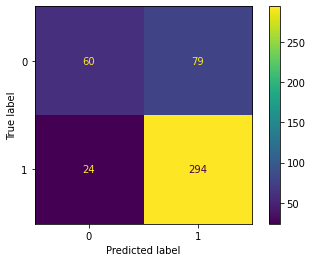

In [12]:
cm = confusion_matrix(test_labels, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()